In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
xs = [1065, 1254, 1300, 1577, 1600, 1750,1800,1870,1935,1948,2254,2600,2800,3000]
ys = [199,288,235,285,239,293,285,365,295,290,385,505,425,415]
sqft=np.array([xs]).T
price = np.array([ys]).T

In [3]:
df=pd.DataFrame([xs, ys])
df = df.transpose()
df.columns=("sqft", "price")
df

,sqft,price
0,1065,199
1,1254,288
2,1300,235
3,1577,285
4,1600,239
5,1750,293
6,1800,285
7,1870,365
8,1935,295
9,1948,290


In [4]:
ones = np.ones((df.shape[0], 1))
Xbar = np.concatenate((ones, sqft), axis=1)
w=np.dot(np.linalg.pinv(np.dot(Xbar.T, Xbar)), np.dot(Xbar.T, price))
w

array([[73.5942803 ],
       [ 0.12984264]])

In [5]:
y=w[0]+w[1]*xs

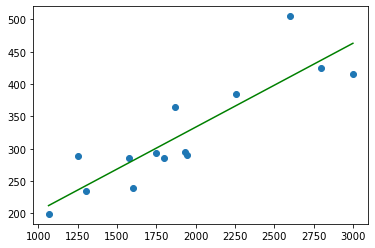

In [6]:
plt.scatter(xs, ys)
plt.plot(xs, y, color='g')

In [9]:
results =sm.OLS(y,Xbar).fit()

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.097e+30
Date:                Fri, 07 May 2021   Prob (F-statistic):          3.87e-175
Time:                        16:17:15   Log-Likelihood:                 387.00
No. Observations:                  14   AIC:                            -770.0
Df Residuals:                      12   BIC:                            -768.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.5943   2.47e-13   2.98e+14      0.0